In [2]:
import platform
print(platform.architecture())

('64bit', '')


In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')





Import the file

In [5]:
df = pd.read_csv('data/player_stats.csv',  encoding='ISO-8859-1')

In [6]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


In [7]:
df.shape

(5682, 41)

Checks to perform

check missing value
check for outliers
check duplicates
check data types
check for the unique value of each column
check statistics of data set
check various categories present in the different categorical column

In [8]:
df.isna().sum()

player               0
country              0
height               0
weight               0
age                  0
club                 0
ball_control         0
dribbling            0
marking           5682
slide_tackle         0
stand_tackle         0
aggression           0
reactions            0
att_position         0
interceptions        0
vision               0
composure            0
crossing             0
short_pass           0
long_pass            0
acceleration         0
stamina              0
strength             0
balance              0
sprint_speed         0
agility              0
jumping              0
heading              0
shot_power           0
finishing            0
long_shots           0
curve                0
fk_acc               0
penalties            0
volleys              0
gk_positioning       0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_reflexes          0
value                0
dtype: int64

In [9]:
df['marking']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5677   NaN
5678   NaN
5679   NaN
5680   NaN
5681   NaN
Name: marking, Length: 5682, dtype: float64

Since marking don't have any value

In [10]:
df = df.drop('marking', axis=1)

In [11]:
df.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [12]:
df.duplicated().sum()

3

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df = df.drop('player', axis=1)

In [15]:
df

,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Colombia,192,84,22,Atl. Nacional,55,43,68,73,72,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Brazil,181,80,31,Corinthians,69,70,56,58,62,...,65,62,48,46,12,15,14,8,14,$975.00
2,Germany,193,84,29,Holstein Kiel,25,12,13,16,27,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Austria,187,86,33,SK Rapid Wien,46,48,66,69,71,...,25,13,22,19,10,10,8,14,9,$650.00
4,Uruguay,191,80,23,Independiente,14,8,14,16,28,...,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Egypt,175,71,31,Liverpool,86,88,41,43,63,...,84,69,86,83,11,14,14,9,14,$99.500.000
5678,Senegal,174,69,31,FC Bayern München,86,88,38,42,75,...,77,64,75,75,7,10,10,15,14,$101.000.000
5679,Brazil,175,68,31,Paris SG,94,95,29,32,63,...,88,87,91,86,15,9,9,15,11,$99.500.000
5680,Portugal,187,83,38,Al Nassr,87,81,24,32,62,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 0 to 5681
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         5679 non-null   object
 1   height          5679 non-null   int64 
 2   weight          5679 non-null   int64 
 3   age             5679 non-null   int64 
 4   club            5679 non-null   object
 5   ball_control    5679 non-null   int64 
 6   dribbling       5679 non-null   int64 
 7   slide_tackle    5679 non-null   int64 
 8   stand_tackle    5679 non-null   int64 
 9   aggression      5679 non-null   int64 
 10  reactions       5679 non-null   int64 
 11  att_position    5679 non-null   int64 
 12  interceptions   5679 non-null   int64 
 13  vision          5679 non-null   int64 
 14  composure       5679 non-null   int64 
 15  crossing        5679 non-null   int64 
 16  short_pass      5679 non-null   int64 
 17  long_pass       5679 non-null   int64 
 18  acceleration 

In [18]:
df.nunique()

country           135
height             45
weight             49
age                25
club              689
ball_control       87
dribbling          89
slide_tackle       81
stand_tackle       83
aggression         85
reactions          62
att_position       91
interceptions      83
vision             78
composure          76
crossing           86
short_pass         82
long_pass          83
acceleration       84
stamina            82
strength           69
balance            76
sprint_speed       83
agility            73
jumping            68
heading            87
shot_power         74
finishing          91
long_shots         85
curve              85
fk_acc             88
penalties          83
volleys            86
gk_positioning     62
gk_diving          57
gk_handling        57
gk_kicking         62
gk_reflexes        62
value             191
dtype: int64

In [19]:
df.describe()

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
count,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,...,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000
mean,181.669484,75.278042,26.315196,58.916006,56.137524,46.728825,48.820743,56.324881,61.958619,50.735869,...,47.173446,48.110583,43.310090,48.183307,42.939250,16.179961,16.429477,16.185244,16.065152,16.562247
std,6.830105,6.997735,4.730381,16.570252,18.769939,20.519325,20.974848,16.847301,8.892328,19.776480,...,19.462666,18.084352,17.084054,15.780695,17.913396,17.135856,17.624381,16.981929,16.797249,17.929668
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,5.000000,7.000000,4.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,33.000000,36.000000,32.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,60.000000,62.000000,56.000000,...,51.000000,50.000000,43.000000,49.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,62.000000,56.000000,60.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,91.000000,93.000000,94.000000,92.000000,90.000000,90.000000,90.000000,87.000000,90.000000,89.000000


to see what we need mean or median for default

In [20]:
df['value'] = df['value'].astype(str)  # Ensure values are strings
df['value'] = df['value'].str.replace(r'[^\d]', '', regex=True)  # Remove non-digits
df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert to numbers
df['value'] = df['value'].astype('Int64')

In [21]:
df['value']

0         1400000
1           97500
2         1100000
3           65000
4           30000
          ...    
5677     99500000
5678    101000000
5679     99500000
5680     31000000
5681     10500000
Name: value, Length: 5679, dtype: Int64

In [22]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [24]:
print(numerical_feature)

['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'value']


In [29]:
categorical_feature

['country', 'club']

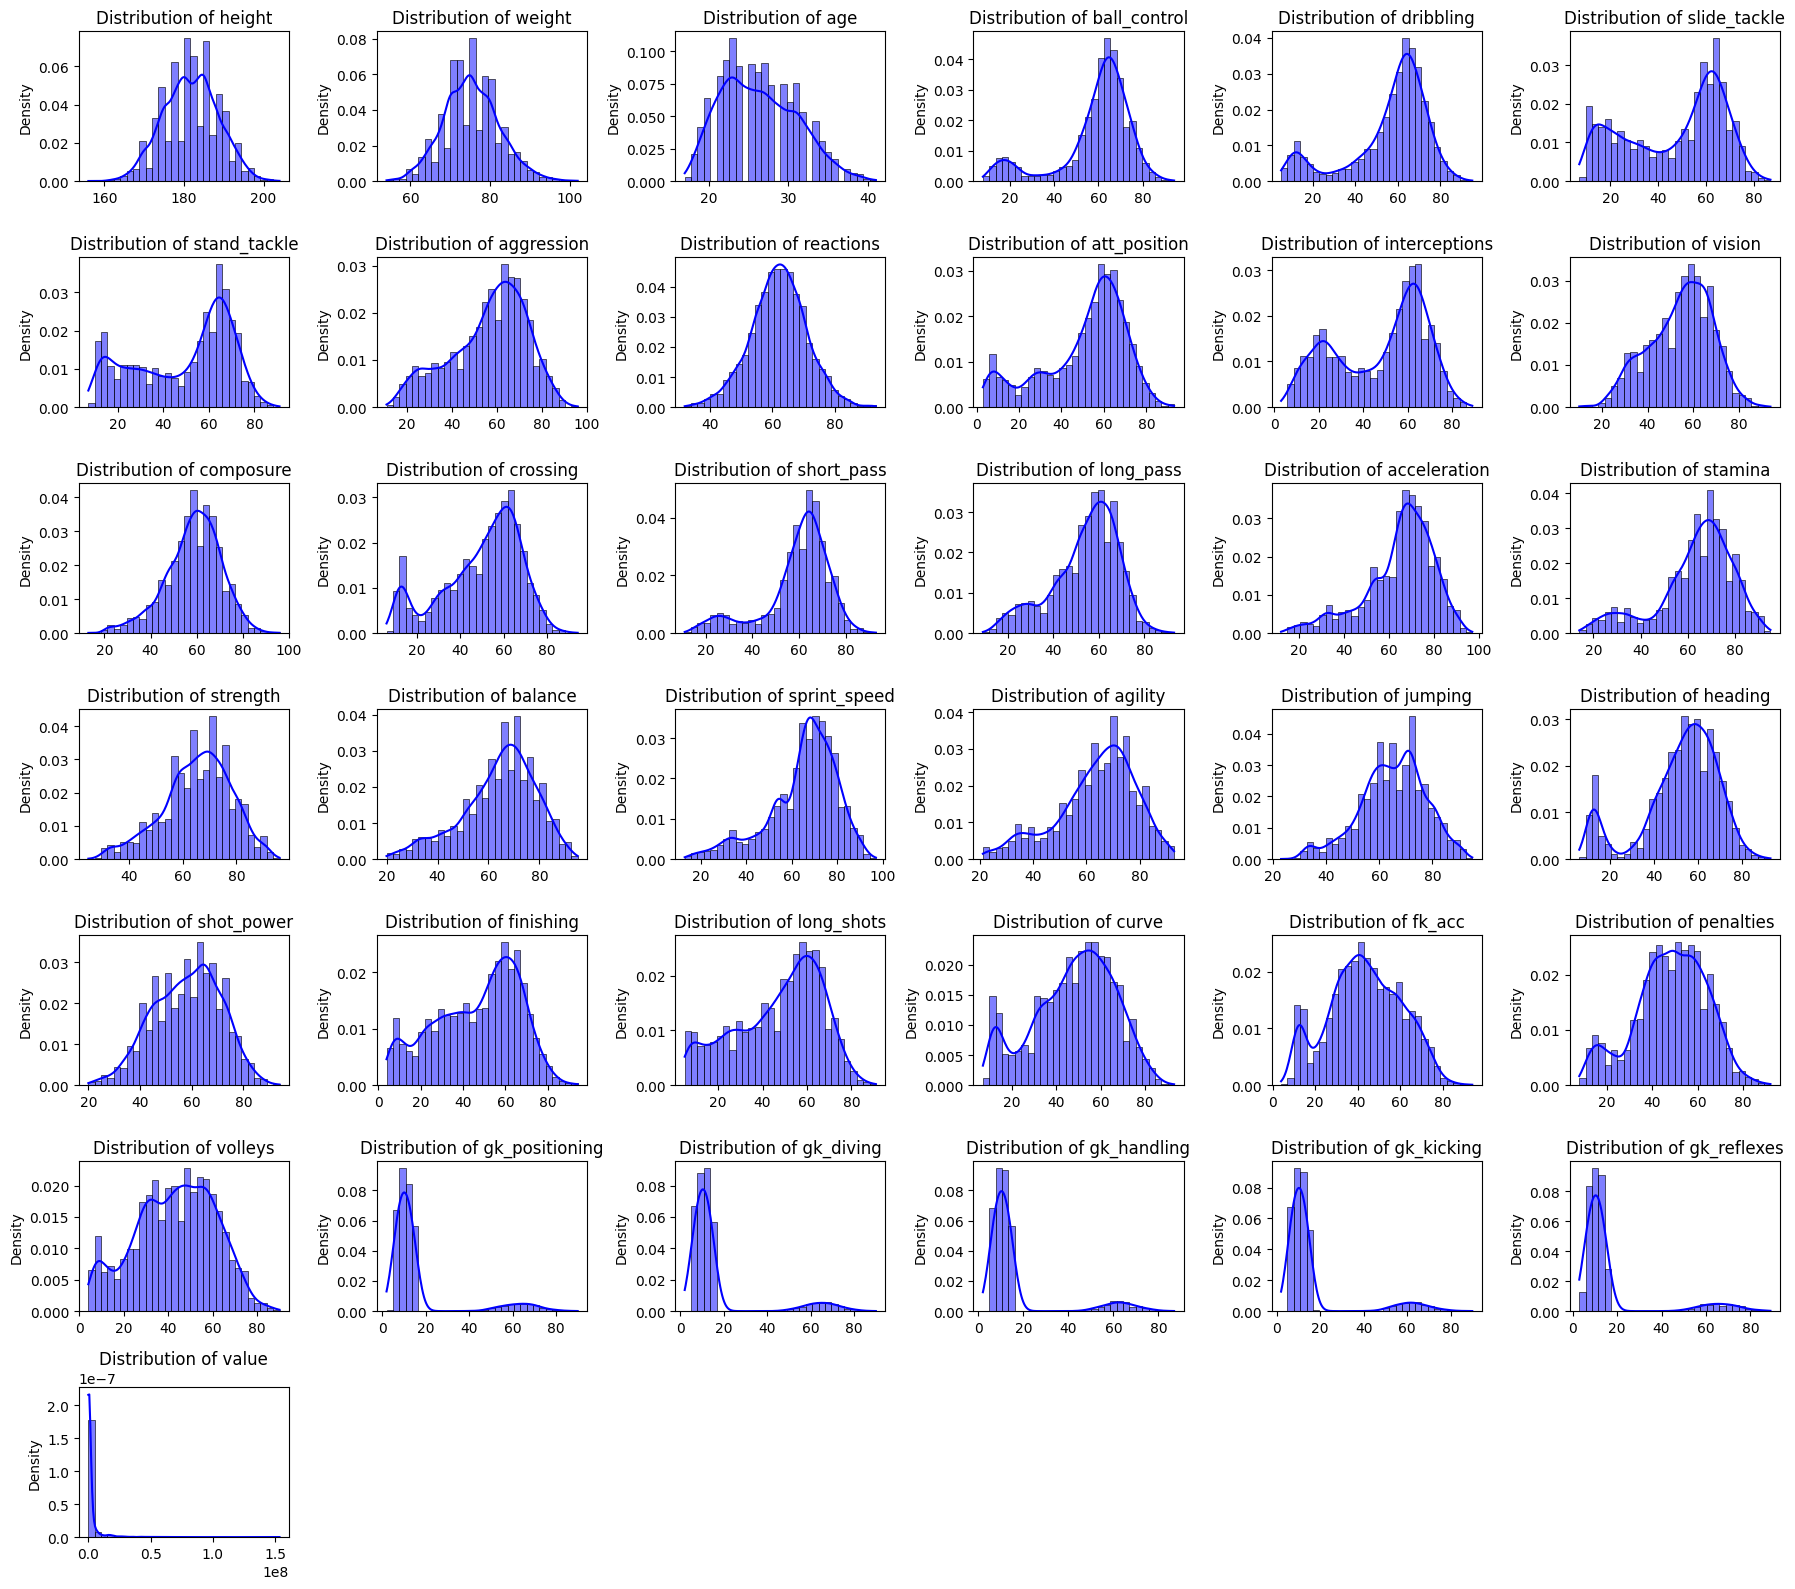

In [30]:
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(18, 16))
axes = axes.flatten() 


for i, feature in enumerate(numerical_feature):
    sns.histplot(df[feature], kde=True, bins=30, stat="density", ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Feature: height | Outliers Count: 31 | Outliers: [162, 163, 200, 204, 163, 200, 201, 201, 203, 200]
Feature: weight | Outliers Count: 24 | Outliers: [97, 100, 100, 97, 96, 96, 98, 96, 99, 97]
Feature: age | Outliers Count: 5 | Outliers: [41, 41, 41, 41, 41]
Feature: ball_control | Outliers Count: 629 | Outliers: [25, 14, 20, 14, 21, 16, 12, 18, 15, 17]
Feature: dribbling | Outliers Count: 656 | Outliers: [12, 8, 16, 10, 20, 11, 11, 14, 11, 5]
Feature: reactions | Outliers Count: 44 | Outliers: [37, 36, 35, 32, 35, 37, 91, 35, 36, 35]
Feature: vision | Outliers Count: 8 | Outliers: [10, 13, 11, 13, 14, 11, 11, 14]
Feature: composure | Outliers Count: 119 | Outliers: [21, 21, 22, 27, 26, 23, 28, 28, 23, 26]
Feature: short_pass | Outliers Count: 570 | Outliers: [35, 23, 25, 28, 30, 24, 21, 16, 29, 28]
Feature: long_pass | Outliers Count: 105 | Outliers: [18, 17, 18, 16, 17, 18, 17, 13, 92, 16]
Feature: acceleration | Outliers Count: 192 | Outliers: [29, 29, 16, 25, 29, 16, 23, 22, 16, 27]

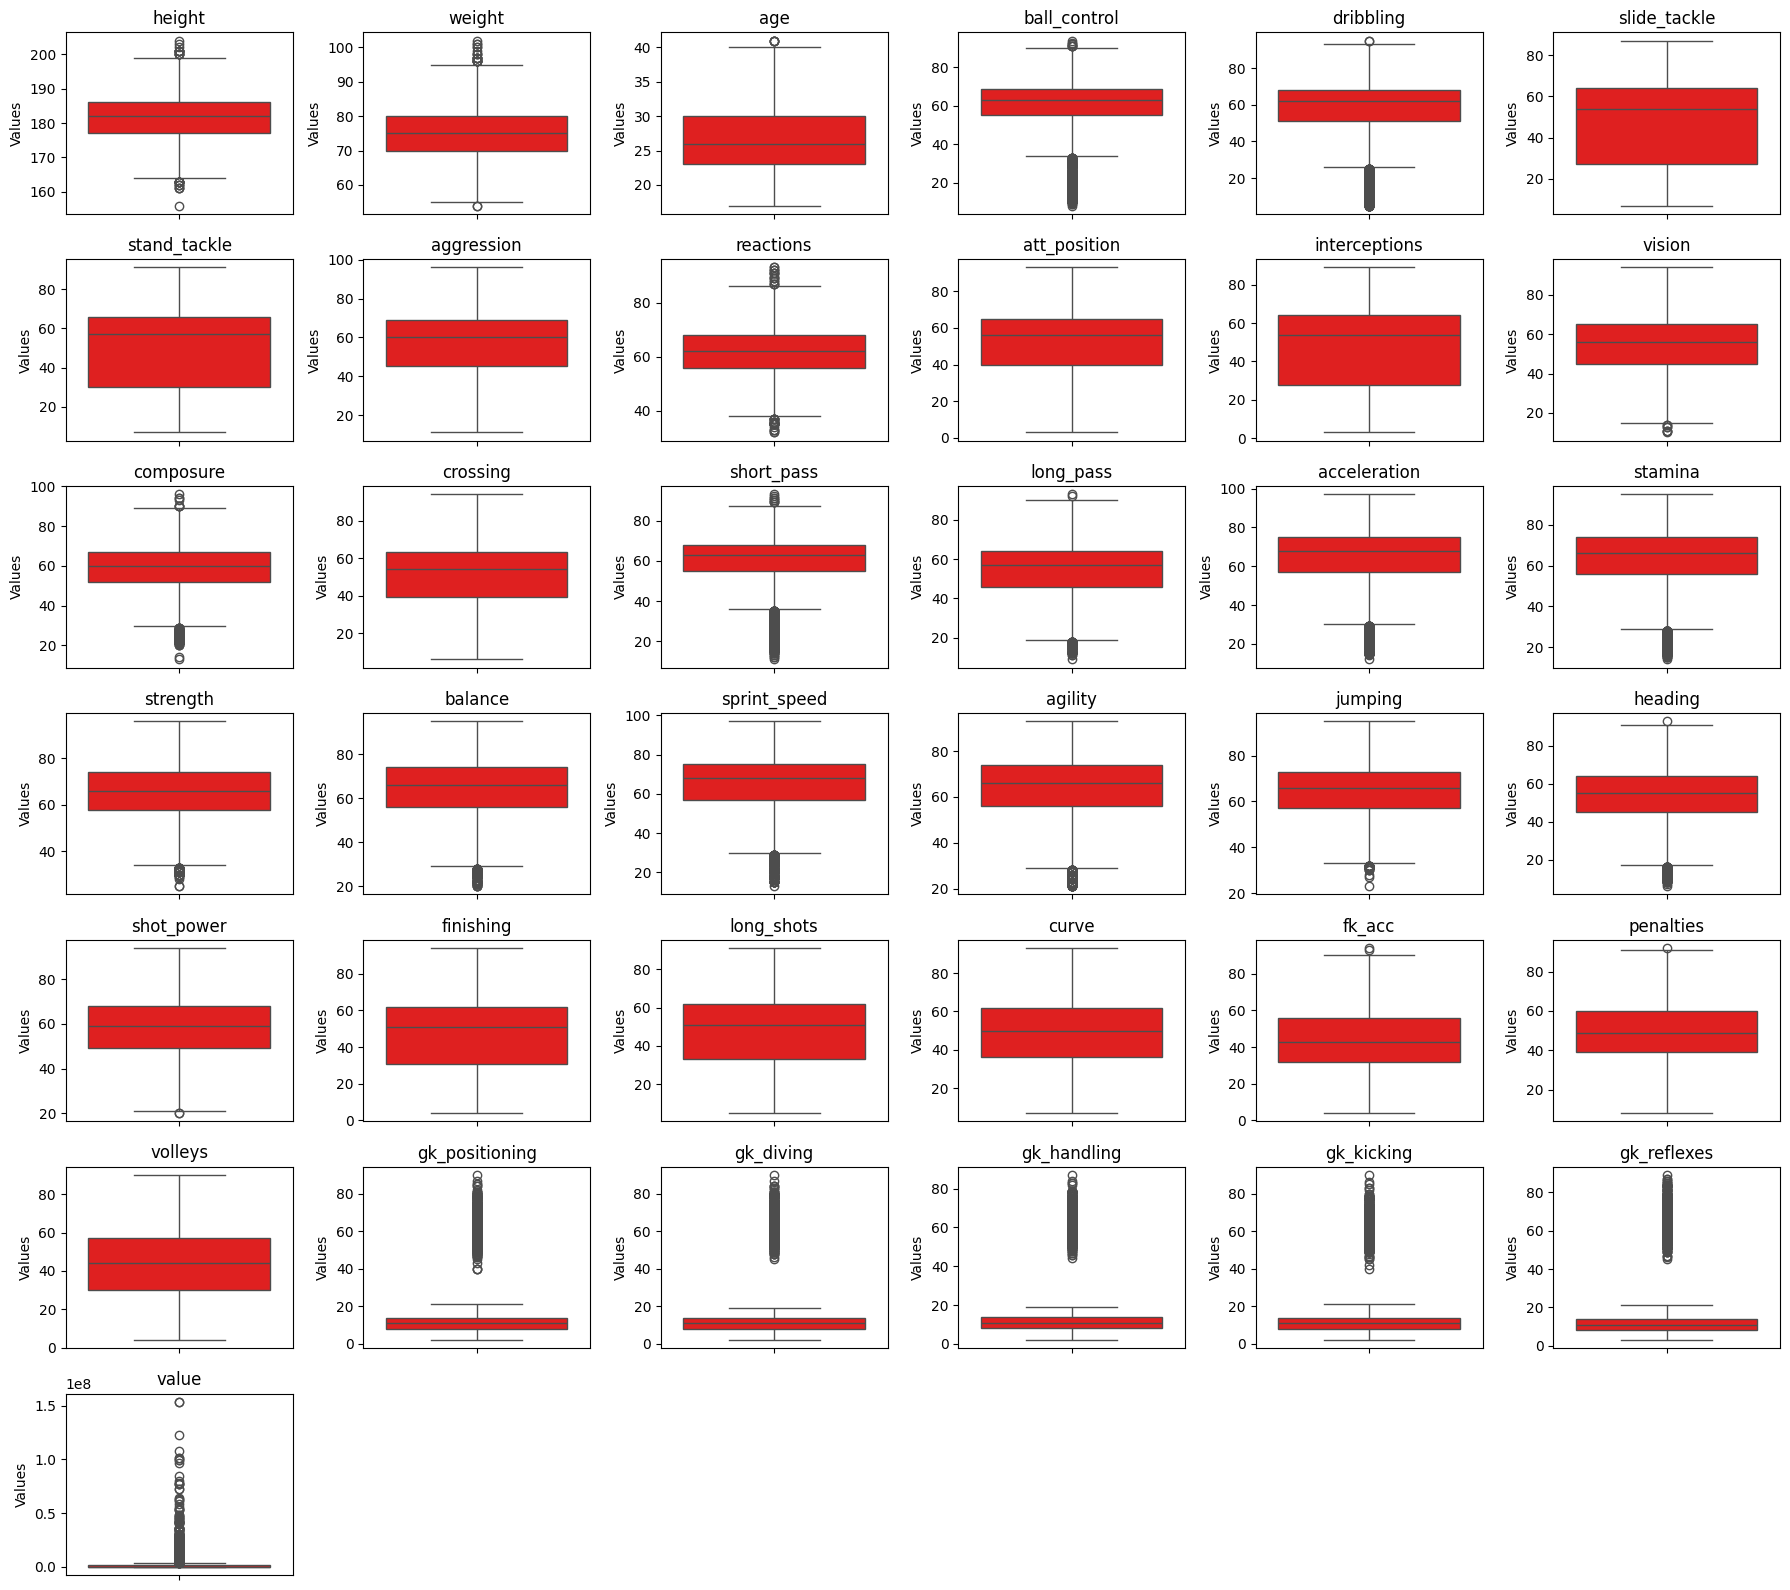

In [31]:
outliers_dict = {}

# Detect outliers using IQR method
for feature in numerical_feature:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    # Store results if outliers exist
    if not outliers.empty:
        outliers_dict[feature] = outliers.tolist()

# Print summary of detected outliers
for feature, outliers in outliers_dict.items():
    print(f"Feature: {feature} | Outliers Count: {len(outliers)} | Outliers: {outliers[:10]}")  # Show first 10

# Visualization: Boxplots to detect outliers
plt.figure(figsize=(18, 16))

for i, feature in enumerate(numerical_feature, 1):
    plt.subplot(7, 6, i)  # 6x6 grid
    sns.boxplot(y=df[feature], color="red")
    plt.title(feature)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()